In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame

In [3]:
feature_names = data.feature_names + ["MedHouseVal"]
corr_matrix = df[feature_names].corr()

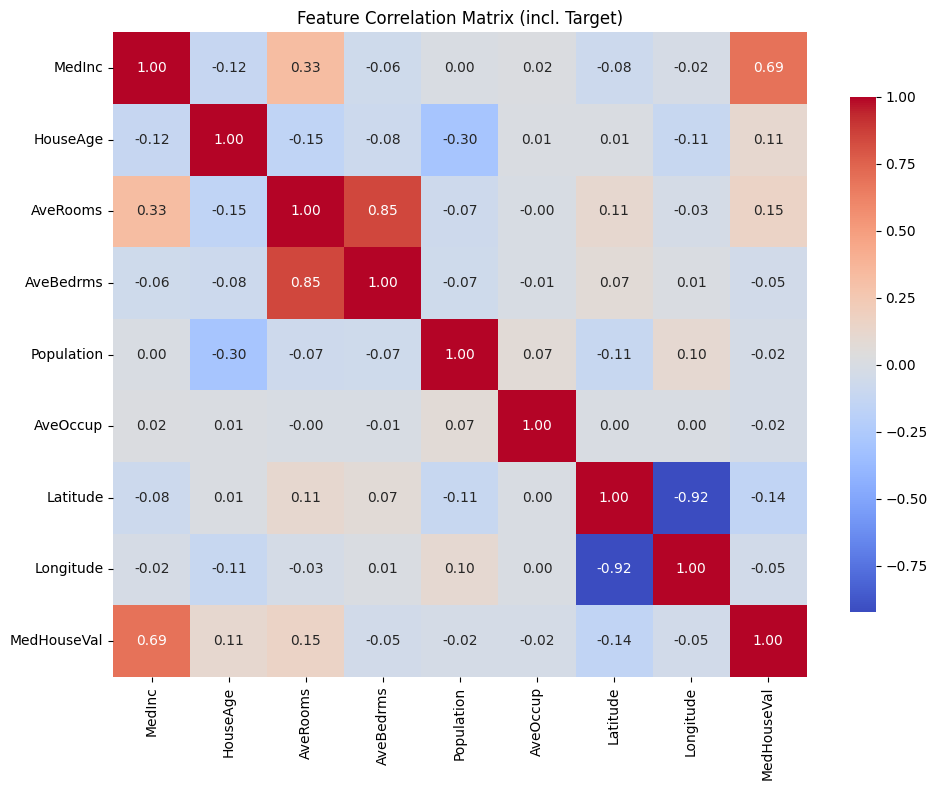

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8}
)
plt.title("Feature Correlation Matrix (incl. Target)")
plt.tight_layout()
plt.show()

In [5]:
target_corr = corr_matrix["MedHouseVal"].drop("MedHouseVal")
target_corr_sorted = target_corr.abs().sort_values(ascending=False)
print("Features ranked by absolute correlation with target (MedHouseVal):")
for feat, corr_val in target_corr_sorted.items():
    sign = np.sign(target_corr[feat])
    print(f"  {feat:>12}: {sign * corr_val:.3f}")

Features ranked by absolute correlation with target (MedHouseVal):
        MedInc: 0.688
      AveRooms: 0.152
      Latitude: -0.144
      HouseAge: 0.106
     AveBedrms: -0.047
     Longitude: -0.046
    Population: -0.025
      AveOccup: -0.024


## Discussion of Multicollinearity

Multicollinearity occurs when two or more predictors in a regression model are highly correlated with each other. This can:

* Inflate the variance of the coefficient estimates, making them unstable and sensitive to small changes in the data.
* Make it difficult to assess the individual effect of each feature on the target.
* Increase the risk of overfitting.

**Common remedies include:**

1. **Dropping or Combining Correlated Features**
   Remove redundant predictors or merge them into a single composite variable.

2. **Dimensionality Reduction**
   Apply techniques like Principal Component Analysis (PCA) to transform correlated features into a smaller set of uncorrelated components.

3. **Regularized Regression Methods**
   Use **Ridge** or **Lasso** regression, which add a penalty on large coefficients to mitigate the impact of multicollinearity.